In [104]:
import pandas as pd
import re
import matplotlib.pyplot as plt
df = pd.read_csv('structured_data.csv')

In [105]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [106]:
# List of entity columns to check
entity_columns = ['Gender', 'Disease', 'Symptoms', 'Allergies', 'Addictions', 
                  'Medical Conditions', 'Drug Usage', 'Past Procedures', 'Treatment Type']

mask = df[entity_columns].apply(lambda x: (x == 'Not found').all(), axis=1)
df = df[~mask]


In [107]:
# Drop rows where 'Treatment Type' is 'Not found'
df = df[df['Treatment Type'] != 'Not found']
df = df.dropna(subset=['Treatment Type'])
df['Treatment Type'] = df['Treatment Type'].str.extract(r'([^(\n]+)')

In [108]:
treatment_counts = df['Treatment Type'].value_counts()

# Identify treatments that appear less than or equal to 2 times
treatments_to_replace = treatment_counts[treatment_counts <= 2].index

# Replace these treatments with 'Others'
df['Treatment Type'] = df['Treatment Type'].replace(treatments_to_replace, 'Others')

In [109]:
import pandas as pd

# Sample DataFrame
# df = pd.DataFrame({'Treatment Type': [...]})

# Mapping for treatment types
treatment_mapping = {
    'Medication/Pharmacotherapy, Surgery': 'Medication/Pharmacotherapy',
    'IV Fluids, Medication/Pharmacotherapy': 'Medication/Pharmacotherapy',
    'Chemotherapy, Medication/Pharmacotherapy, Palliative Care, Radiation Therapy': 'Combined Therapy',
    'Chemotherapy, Radiation Therapy': 'Combined Therapy',
    'Lifestyle Changes, Medication/Pharmacotherapy': 'Medication/Pharmacotherapy',
    'Dietary Management/Nutritional Therapy, Lifestyle Changes, Medication/Pharmacotherapy': 'Lifestyle and Medication',
    'Physical Therapy/Rehabilitation, Surgery': 'Physical Therapy/Rehabilitation',
    'Chemotherapy, Medication/Pharmacotherapy, Radiation Therapy': 'Combined Therapy',
    'Dietary Management/Nutritional Therapy, Hormone Therapy, Lifestyle Changes, Medication/Pharmacotherapy': 'Lifestyle and Medication',
    'Immunotherapy, Medication/Pharmacotherapy': 'Medication/Pharmacotherapy',
    'Nitric oxide, Oxygen': 'Oxygen Therapy',
    'Counseling, Medication/Pharmacotherapy': 'Medication/Pharmacotherapy',
    'Chiropractic management, Physical Therapy/Rehabilitation': 'Physical Therapy/Rehabilitation',
    'Hemodialysis, Medication/Pharmacotherapy': 'Medication/Pharmacotherapy',
    '0.3 mL subcutaneously, Benadryl, Medication/Pharmacotherapy, epinephrine 1:1000': 'Medication/Pharmacotherapy',
    'Conscious Sedation': 'Sedation',
    'Conscious sedation': 'Sedation',
    'Dietary Management/Nutritional Therapy, Lifestyle Changes': 'Lifestyle and Dietary Management',
    'Dietary Management/Nutritional Therapy, Lifestyle Changes, Medication/Pharmacotherapy, Palliative Care, Physical Therapy/Rehabilitation': 'Lifestyle and Medication',
    'Conscious sedation, Percutaneous biopsy, Tract embolization with Gelfoam pledgets': 'Sedation and Procedure',
    'Lifestyle Changes, Medication/Pharmacotherapy, Physical Therapy/Rehabilitation': 'Lifestyle and Medication',
    'Medication/Pharmacotherapy, Palliative Care': 'Medication/Pharmacotherapy',
    'Medication/Pharmacotherapy, Psychotherapy/Counseling': 'Medication/Pharmacotherapy',
    'Dietary Management/Nutritional Therapy, Medication/Pharmacotherapy': 'Lifestyle and Medication',
    'Dietary Management/Nutritional Therapy, Lifestyle Changes, Medication/Pharmacotherapy, Physical Therapy/Rehabilitation': 'Lifestyle and Medication',
    'Dietary Management/Nutritional Therapy, Lifestyle Changes, Physical Activity': 'Lifestyle and Dietary Management',
    'MRI of the spine without contrast, Medication/Pharmacotherapy': 'Medication/Pharmacotherapy',
    'Medication/Pharmacotherapy, Occupational Therapy': 'Medication/Pharmacotherapy',
    'Lifestyle Changes, Medication/Pharmacotherapy, Psychotherapy/Counseling': 'Medication/Pharmacotherapy',
    'Medication/Pharmacotherapy, Structured Environment': 'Medication/Pharmacotherapy',
    'Medication/Pharmacotherapy, Physical Therapy/Rehabilitation, Psychotherapy/Counseling': 'Lifestyle and Medication',
    'Medication/Pharmacotherapy, Oxygen Therapy': 'Medication/Pharmacotherapy',
    'Dietary Management/Nutritional Therapy, Lifestyle Changes, Medication/Pharmacotherapy, Physical Therapy/Rehabilitation, Psychotherapy/Counseling': 'Lifestyle and Medication',
    'Medication/Pharmacotherapy, Palliative Care, Physical Therapy/Rehabilitation': 'Lifestyle and Medication',
    'Chemotherapy, Medication/Pharmacotherapy': 'Combined Therapy',
    'Medication/Pharmacotherapy, Radiation Therapy': 'Medication/Pharmacotherapy',
    'Dietary Management/Nutritional Therapy, Hormone Therapy, Lifestyle Changes, Medication/Pharmacotherapy, Physical Therapy/Rehabilitation': 'Lifestyle and Medication',
    'Medication/Pharmacotherapy, Monitoring': 'Medication/Pharmacotherapy',
    'Dietary Management/Nutritional Therapy, Lifestyle Changes, Medication/Pharmacotherapy, Psychotherapy/Counseling': 'Lifestyle and Medication',
    'Observation': 'Others',
    'No further intervention': 'Others',
    'Irrigation debridement, Removal of foreign body': 'Others',
    'Medication/Pharmacotherapy, Observation': 'Medication/Pharmacotherapy',
    'Dietary Management/Nutritional Therapy': 'Dietary Management/Nutritional Therapy',
    # ... Add other specific mappings as needed ...
}

# Apply the mapping to the DataFrame
df['Treatment Type'] = df['Treatment Type'].replace(treatment_mapping)

# Display the top 20 treatment types after mapping
print(df['Treatment Type'].value_counts().head(20))


Surgery                                                                                                                   2174
Others                                                                                                                     592
Medication/Pharmacotherapy                                                                                                 570
Medication/Pharmacotherapy, Surgery                                                                                        561
Medication/Pharmacotherapy                                                                                                 106
Medication/Pharmacotherapy, Dietary Management/Nutritional Therapy, Lifestyle Changes                                       49
Physical Therapy/Rehabilitation                                                                                             43
Medication/Pharmacotherapy, Physical Therapy/Rehabilitation                                                    

In [110]:
import pandas as pd

# Sample DataFrame
# df = pd.DataFrame({'Treatment Type': [...]})

# Enhanced mapping for treatment types
treatment_mapping = {
    'Medication/Pharmacotherapy, Surgery ': 'Medication/Pharmacotherapy',
    'Radiation Therapy ': 'Radiation Therapy',
    'Medication/Pharmacotherapy ': 'Medication/Pharmacotherapy',
    'Medication/Pharmacotherapy, IV Fluids': 'Medication/Pharmacotherapy',
    'Medication/Pharmacotherapy; Surgery ': 'Medication/Pharmacotherapy',
    'Medication/Pharmacotherapy, Lifestyle Changes': 'Lifestyle and Medication',
    'Medication/Pharmacotherapy, Dietary Management/Nutritional Therapy, Lifestyle Changes': 'Lifestyle and Medication',
    'Medication/Pharmacotherapy, Physical Therapy/Rehabilitation, Dietary Management/Nutritional Therapy, Lifestyle Changes, Palliative Care': 'Lifestyle and Medication',
    'Sedation and Procedure': 'Sedation',
    'Lifestyle and Dietary Management': 'Lifestyle and Medication',
    'Physical Therapy/Rehabilitation, Surgery ': 'Physical Therapy/Rehabilitation',
    'Medication/Pharmacotherapy, Physical Therapy/Rehabilitation, Lifestyle Changes': 'Lifestyle and Medication',
    'CPAP': 'Others',
    'Chemotherapy ': 'Chemotherapy',
    'Medication/Pharmacotherapy, Dietary Management/Nutritional Therapy': 'Lifestyle and Medication',
    'Medication/Pharmacotherapy, Physical Therapy/Rehabilitation, Dietary Management/Nutritional Therapy, Lifestyle Changes': 'Lifestyle and Medication',
    'Dietary Management/Nutritional Therapy, Physical Activity, Lifestyle Changes': 'Lifestyle and Medication',
    'Medication/Pharmacotherapy, Radiation Therapy, Chemotherapy': 'Combined Therapy',
    'Medication/Pharmacotherapy, Dietary Management/Nutritional Therapy, Lifestyle Changes, Hormone Therapy': 'Lifestyle and Medication',
    'Medication/Pharmacotherapy, Physical Therapy/Rehabilitation, Dietary Management/Nutritional Therapy': 'Lifestyle and Medication',
    'Pharmacotherapy': 'Medication/Pharmacotherapy',
    'Medication/Pharmacotherapy, MRI of the spine without contrast': 'Medication/Pharmacotherapy',
    'Medication/Pharmacotherapy, Psychotherapy/Counseling, Lifestyle Changes': 'Lifestyle and Medication',
    'Medication/Pharmacotherapy, Immunotherapy': 'Medication/Pharmacotherapy',
    'Oxygen, Nitric oxide': 'Oxygen Therapy',
    'Photo treatments': 'Others',
    'Medication/Pharmacotherapy, Counseling': 'Medication/Pharmacotherapy',
    'Medication/Pharmacotherapy, Physical Therapy/Rehabilitation, Psychotherapy/Counseling, Dietary Management/Nutritional Therapy, Lifestyle Changes': 'Lifestyle and Medication',
    'Medication/Pharmacotherapy, Physical Therapy/Rehabilitation, Palliative Care': 'Medication/Pharmacotherapy',
    'Medication/Pharmacotherapy, Chemotherapy': 'Combined Therapy',
    'Medication/Pharmacotherapy, Physical Therapy/Rehabilitation, Dietary Management/Nutritional Therapy, Lifestyle Changes, Hormone Therapy': 'Lifestyle and Medication',
    'Medication/Pharmacotherapy, Hemodialysis': 'Medication/Pharmacotherapy',
    'Colonoscopy, Conscious Sedation': 'Sedation',
    'Medication/Pharmacotherapy, Benadryl, epinephrine 1:1000, 0.3 mL subcutaneously': 'Medication/Pharmacotherapy',
    'Medication/Pharmacotherapy, Psychotherapy/Counseling, Dietary Management/Nutritional Therapy, Lifestyle Changes': 'Lifestyle and Medication',
    # ... Add other specific mappings as needed ...
}

# Apply the mapping to the DataFrame
df['Treatment Type'] = df['Treatment Type'].replace(treatment_mapping)

# Display the top 20 treatment types after mapping
print(df['Treatment Type'].value_counts().head(20))


Surgery                                                                         2174
Medication/Pharmacotherapy                                                      1280
Others                                                                           598
Lifestyle and Medication                                                         186
Physical Therapy/Rehabilitation                                                   48
Medication/Pharmacotherapy, Physical Therapy/Rehabilitation                       39
Radiation Therapy                                                                 31
Chemotherapy                                                                      13
Sedation                                                                          12
Combined Therapy                                                                  10
Chemical cauterization                                                             4
Oxygen Therapy                                                   

Average AUC ROC: 0.7540657270201161


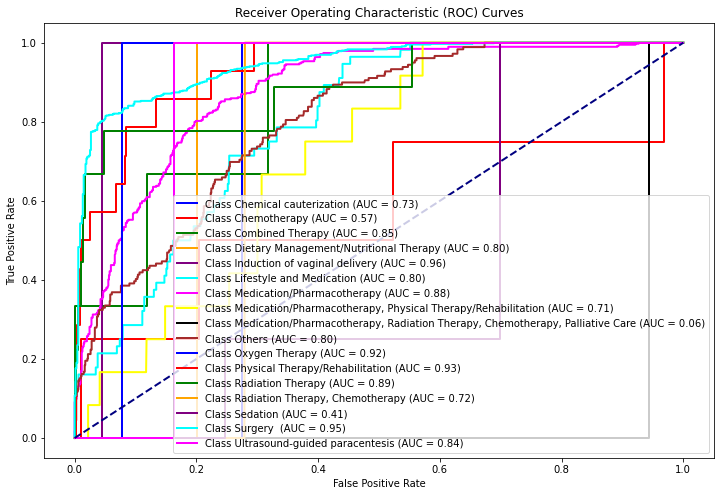

In [111]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, matthews_corrcoef
import numpy as np

X = df['transcription']
y = df['Treatment Type']

# Vectorizing the text data
td = TfidfVectorizer(max_features=4500)
X = td.fit_transform(X).toarray()

# Encoding the labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)
classes = le.classes_

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, stratify=y_encoded, random_state=0)

# Training the classifier
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

# Predicting probabilities for each class
y_score = classifier.predict_proba(X_test)

# Calculating ROC AUC for each class and averaging
roc_auc_scores = []
for i in range(len(classes)):
    actual = (y_test == i).astype(int)
    predicted = y_score[:, i]
    
    # Check if the true label contains at least one positive and one negative sample
    if len(np.unique(actual)) > 1:
        roc_auc = roc_auc_score(actual, predicted)
        roc_auc_scores.append(roc_auc)

roc_auc_avg = np.mean(roc_auc_scores)
print('Average AUC ROC:', roc_auc_avg)

# Colors for different ROC curves
colors = ['blue', 'red', 'green', 'orange', 'purple', 'cyan', 'magenta', 'yellow', 'black', 'brown']

plt.figure(figsize=(12, 8))

# Plot ROC curve for each class
for i in range(len(classes)):
    # Check if the true label contains at least one positive and one negative sample
    if len(np.unique(y_test == i)) > 1:
        fpr, tpr, _ = roc_curve(y_test == i, y_score[:, i])
        plt.plot(fpr, tpr, color=colors[i % len(colors)], lw=2, 
                 label=f'Class {classes[i]} (AUC = {auc(fpr, tpr):0.2f})')

# Plot diagonal line (represents a no-skill classifier)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()

Average AUC ROC: 0.9440588624027076


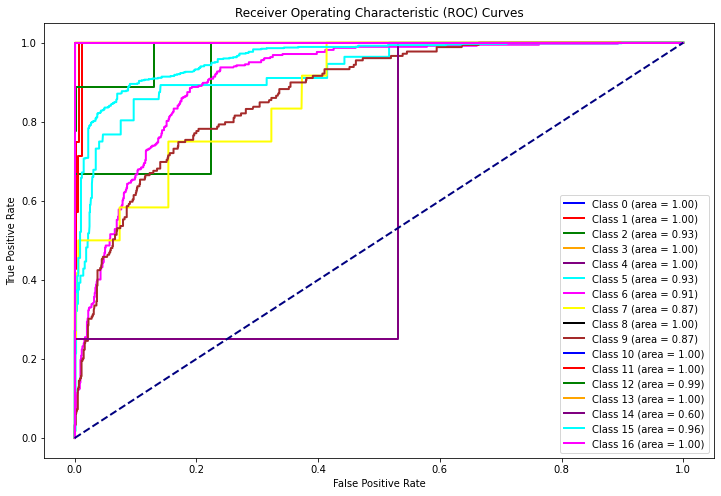

In [112]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
import numpy as np

# Assuming 'dataset' is your DataFrame with two columns: transcription and medical_speciality
X = df['transcription']  # Transcriptions
y = df['Treatment Type'] # Medical Specialities

# Binarize the output labels for multi-class
y_binarized = label_binarize(y, classes=np.unique(y))
n_classes = y_binarized.shape[1]

# Building a TF-IDF matrix out of the corpus of transcriptions
td = TfidfVectorizer(max_features=4500)
X = td.fit_transform(X).toarray()

# Splitting into training & test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y_binarized, test_size=0.3, 
                                                    random_state=0, stratify=y)
# Create a One-vs-Rest Logistic Regression classifier
classifier = OneVsRestClassifier(LogisticRegression(class_weight='balanced'))
classifier.fit(X_train, y_train)

# Predict probabilities for each class
y_score = classifier.predict_proba(X_test)

# Compute ROC AUC for each class and average
roc_auc = []
for i in range(n_classes):
    # Check if the true label contains at least one positive and one negative sample
    if len(np.unique(y_test[:, i])) > 1:
        fpr, tpr, _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc.append(auc(fpr, tpr))

# Safe averaging, ignoring 'nan' values
roc_auc_avg = np.nanmean(roc_auc)

print('Average AUC ROC:', roc_auc_avg)


# Colors for different ROC curves
colors = ['blue', 'red', 'green', 'orange', 'purple', 'cyan', 'magenta', 'yellow', 'black', 'brown']

plt.figure(figsize=(12, 8))

# Plot ROC curve for each class
for i in range(n_classes):
    if len(np.unique(y_test[:, i])) > 1:
        fpr, tpr, _ = roc_curve(y_test[:, i], y_score[:, i])
        plt.plot(fpr, tpr, color=colors[i % len(colors)], lw=2, label=f'Class {i} (area = {auc(fpr, tpr):0.2f})')

# Plot diagonal line (represents a no-skill classifier)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()

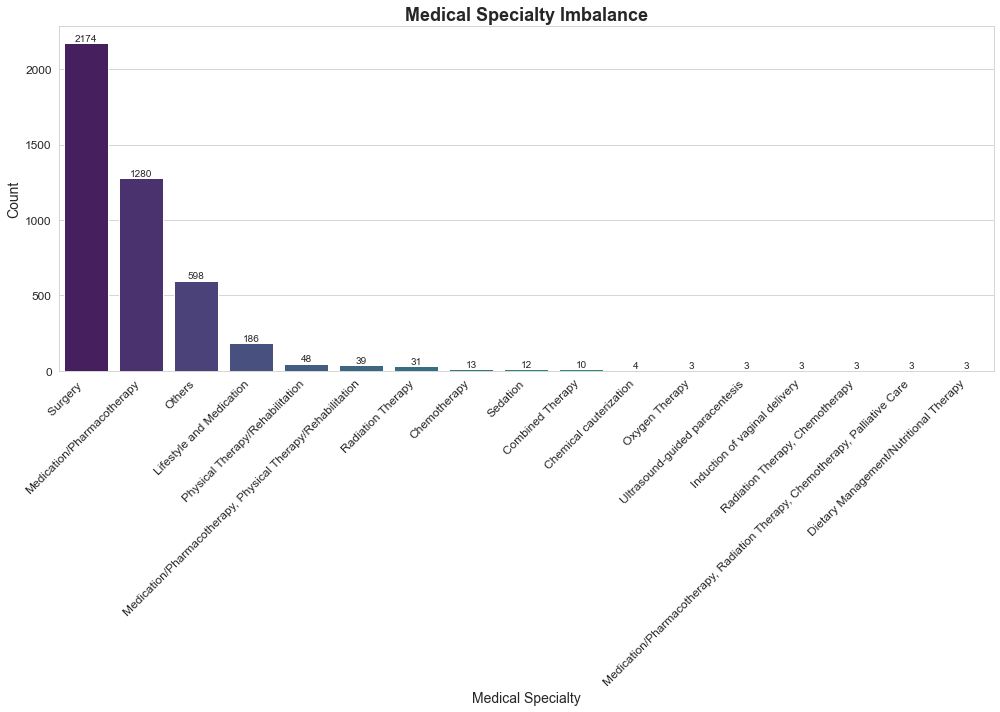

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

specialty_counts = df['Treatment Type'].value_counts()
sns.set_style("whitegrid")
plt.figure(figsize=(14, 10))
sns.barplot(x=specialty_counts.index, y=specialty_counts.values, palette="viridis")
plt.title('Medical Specialty Imbalance', fontsize=18, fontweight='bold')
plt.xlabel('Medical Specialty', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
for index, value in enumerate(specialty_counts.values):
    plt.text(index, value, f'{value}', ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()